# Placement predictor

### Loading libraries

In [1]:
# To load and transform data
import pandas as pd

# To visualize data set
import matplotlib.pyplot as plt

# To standardize data
from sklearn.preprocessing import StandardScaler

# To split data between training data and test data
from sklearn.model_selection import train_test_split

# loading model
from sklearn.linear_model import LogisticRegression

# To test accuracy
from sklearn.metrics import accuracy_score

# To save trained model
from pickle import dump


### Loading data

In [2]:
data = pd.read_csv("placement.csv").drop("Unnamed: 0", axis = 1)

### Sample data

In [3]:
data.sample(5)

,cgpa,iq,placement
40,4.9,134.0,0
75,4.8,169.0,0
59,4.8,112.0,0
14,6.1,103.0,0
3,7.4,132.0,1


### Exploring data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
data.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


### Visualization of data 

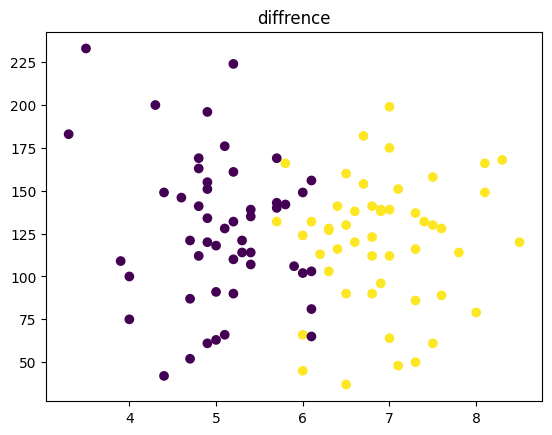

In [6]:
plt.scatter(data.cgpa,data.iq, c = data.placement)
plt.title("diffrence")
plt.show()

### Standardizing features in a dataset

In [7]:
scaler = StandardScaler()

In [8]:
dt_input = scaler.fit_transform(data[["cgpa","iq"]])

In [9]:
dt_output = data.placement

### Splitting data between train and test data 

In [10]:
i_train,i_test,o_train,o_test = train_test_split(dt_input,dt_output,test_size=0.1)

In [11]:
i_train

array([[ 0.0079093 , -1.44877303],
       [ 0.44731478, -0.84490793],
       [ 0.53519588,  0.36282228],
       [-0.51937728,  0.38798333],
       [ 1.15036356, -0.19072073],
       [-0.25573399,  1.14281471],
       [ 0.62307698,  1.46990831],
       [ 2.02917452,  1.11765366],
       [ 1.32612575,  0.16153392],
       [ 1.41400685, -0.87006897],
       [-1.13454496, -0.92039106],
       [ 0.27155259,  0.08605078],
       [-0.25573399,  0.41314438],
       [-0.51937728,  0.28733915],
       [ 0.0079093 ,  0.01056764],
       [-0.60725838, -0.0649155 ],
       [ 0.35943369, -0.19072073],
       [-0.78302057,  0.11121182],
       [-1.39818825,  0.63959379],
       [ 0.0957904 ,  0.21185601],
       [ 1.58976904, -0.24104282],
       [ 0.71095807, -0.01459341],
       [-1.04666386,  0.99184843],
       [ 0.79883917,  0.36282228],
       [ 0.97460136,  0.68991588],
       [ 0.18367149, -0.26620387],
       [ 0.88672027,  1.29378099],
       [ 0.0957904 , -0.51781433],
       [ 0.71095807,

In [12]:
o_train

45    1
79    1
48    1
12    0
72    1
     ..
96    0
8     0
67    0
56    0
89    0
Name: placement, Length: 90, dtype: int64

In [13]:
i_test

array([[ 0.88672027, -1.49909512],
       [ 0.0079093 , -1.977155  ],
       [ 1.76553123, -1.12167943],
       [-1.04666386, -0.29136491],
       [-0.69513948, -0.341687  ],
       [-1.04666386,  1.14281471],
       [ 0.0079093 ,  0.63959379],
       [-1.13454496, -1.80102767],
       [ 2.20493672, -0.09007654],
       [ 1.32612575, -1.57457826]])

In [14]:
o_test

64    1
10    1
58    1
59    0
92    0
75    0
33    0
94    0
69    1
44    1
Name: placement, dtype: int64

### Training the model

In [15]:
clf = LogisticRegression()

In [16]:
clf.fit(i_train,o_train)

LogisticRegression()

### Predictions

In [17]:
o_predict = clf.predict(i_test)
o_predict

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [18]:
o_test.values

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

### Testing the accuracy of the model

In [19]:
accuracy_score(o_test,o_predict)

0.8

### Plotting the model

In [20]:
from mlxtend.plotting import plot_decision_regions

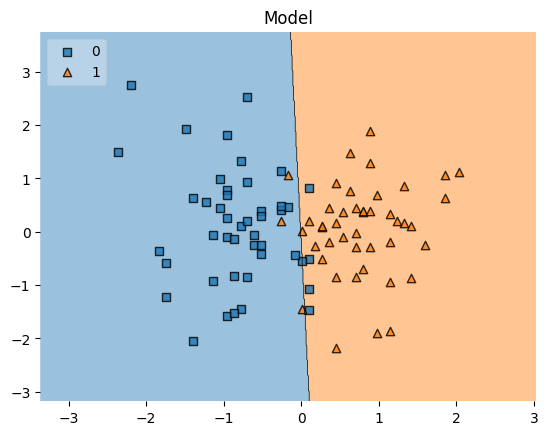

In [21]:
plot_decision_regions(i_train,o_train.values, clf = clf, legend = 2)
plt.title("Model")
plt.show()

### Saving the model

In [22]:
dump(clf, open("model.pkl","wb"))